In [86]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline
print('matplotlib: {}'.format(mpl.__version__))

matplotlib: 3.4.3


In [102]:
df = pd.read_csv('last_fm_data.csv', quotechar='"')

df['played_date'] = pd.to_datetime(df['played_date'])

df = df.sort_values('played_date')
last_data = df['played_date'].max()
last_data = last_data.replace(hour=0, minute=0, second=0)
two_weeks = last_data - dt.timedelta(days=14)
print(last_data)
print(two_weeks)

df2 = df.loc[(df['played_date'] >= two_weeks) & (df['played_date'] < last_data)]

df2.describe()

2021-12-04 00:00:00
2021-11-20 00:00:00


/tmp/ipykernel_1378/794348339.py:14: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df2.describe()


,played_date,track_name,artist,album,album_art_link
count,263,263,263,263,263
unique,262,233,134,154,152
top,2021-11-21 17:12:00,Cut My Wings,Seasick Steve,Donda,https://lastfm.freetls.fastly.net/i/u/300x300/...
freq,2,4,16,12,12
first,2021-11-20 19:19:00,NaN,NaN,NaN,NaN
last,2021-12-03 20:10:00,NaN,NaN,NaN,NaN


In [3]:
def get_top_n(data_in: pd.DataFrame, group_by:str=None, get:str=None, n: int=None) -> pd.DataFrame:
    res = data_in[[get]].groupby(data_in[group_by]).count().sort_values(by=get, ascending=False)
    return res.head(n) if n else res

In [4]:
def horizontal_bar(data_in:pd.DataFrame, x:str=None, label_x:str=None, y:str=None, label_y:str=None) -> None:
    plt.rcdefaults()
    fig, ax = plt.subplots()
    
    label_x = x if not label_x else label_x
    label_y = y if not label_y else label_y
    
    chart_y=None
    
    if y in data_in.columns:
        chart_y = data_in[y].tolist()
    else:
        chart_y = data_in.index.tolist()
    
    y_pos = np.arange(len(chart_y))
    chart_x = data_in[x].tolist()
    
    ax.barh(y_pos, chart_x, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(chart_y)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel(label_x)
    ax.set_title(f'Top {label_y} by {label_x}')

    plt.show()

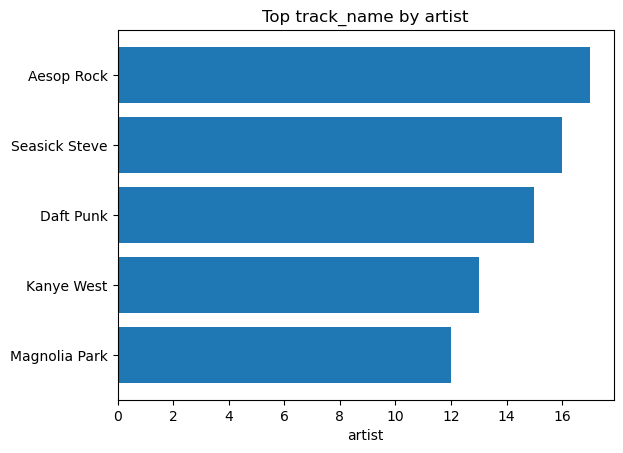

In [5]:
def plot_top(df_in: pd.DataFrame, x:str, y:str, n:int, label_x:str=None, label_y:str=None) -> None:
    
    label_x = x if not label_x else label_x
    label_y = y if not label_y else label_y
    
    tmp = get_top_n(data_in=df_in, group_by=x, get=y, n=n)
    horizontal_bar(data_in=tmp, x=y, y=x, label_x=label_x, label_y=label_y)
    
plot_top(df, x='artist', y='track_name', n=5)

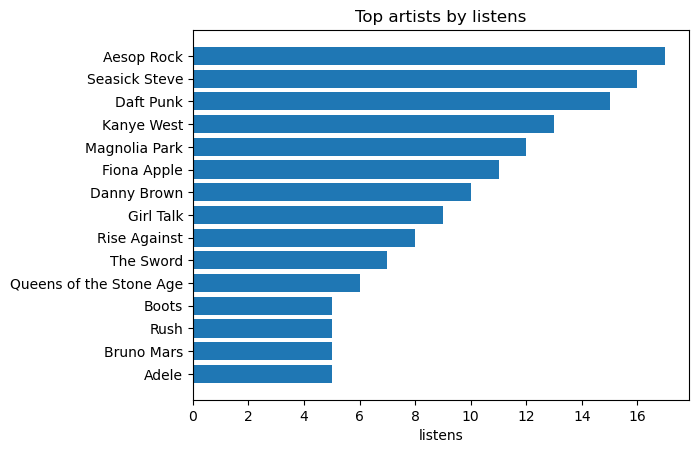

In [6]:
top_songs = get_top_n(data_in=df, group_by='artist', get='album', n=15)
top_songs.rename(columns={'album':'listens'}, inplace=True)
horizontal_bar(data_in=top_songs, x='listens', label_y='artists')

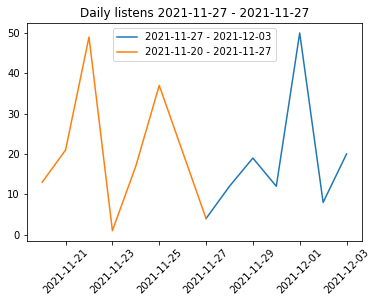

In [146]:
def get_start_and_stop(d_in:pd.DataFrame) -> (str, str):
    return (d_in['date'].min().strftime('%Y-%m-%d'), d_in['date'].max().strftime('%Y-%m-%d'))    

daily = df2[['track_name']].groupby(df2['played_date'].dt.date).count()
daily['date'] = pd.to_datetime(daily.index)

week1 = daily.tail(7)
w1_start, w1_stop = get_start_and_stop(week1)
week1_legend = f'{w1_start} - {w1_stop}'

week2 = daily.tail(14).head(7)
w2_start, w2_stop = get_start_and_stop(week2)
week2_legend = f'{w2_start} - {w2_stop}'

plt.plot(week1['date'].tolist(), week1['track_name'].tolist())
plt.plot(week2['date'].tolist(), week2['track_name'].tolist())
plt.legend([week1_legend, week2_legend])
plt.xticks(rotation=45)
plt.title(f'Daily listens {w1_start} - {w2_stop}')
plt.show()